In [1]:
## set paths to catalog/script files and output directories (for plots)
data_dir = '../hdf5files/'
script_dir = '../SIP_jerome_scripts2/'
out_dir = './'

In [2]:
## load plotting routines
execfile(script_dir+'plot_routines.py')

In [3]:
gds = Table.read(data_dir+'gds.hdf5')

/Users/Andy/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
gds_selection = np.where ( \
                          (gds['PhotFlag']==0) &\
                         (gds['ACS_F814W_FLUX'] > 0) &\
                         (gds['WFC3_F125W_FLUX'] > 0) &\
                         (gds['WFC3_F160W_FLUX'] > 0))
# last 3 conditions ensure log10() exists

In [5]:
gds_final = gds[gds_selection]

In [6]:
## define variables for GOODS-S

f814_gds_flux = gds_final['ACS_F814W_FLUX']  ## rest-frame .814 μm magnitude
f125_gds_flux = gds_final['WFC3_F125W_FLUX']   ## rest-frame 1.25 μm magnitude
f160_gds_flux = gds_final['WFC3_F160W_FLUX']   ## rest-frame 1.60 μm magnitude

f814_gds_mag = -2.5*np.log10(f814_gds_flux)
f125_gds_mag = -2.5*np.log10(f125_gds_flux)
f160_gds_mag = -2.5*np.log10(f160_gds_flux)

f814_f125_gds = f814_gds_mag - f125_gds_mag
f125_f160_gds = f125_gds_mag - f160_gds_mag

mstar_gds = gds_final['M_med'] # already logged?
z_gds = gds_final['z_best']  ## redshift

In [7]:
egs = Table.read(data_dir+'egs.hdf5')

In [8]:
egs_selection = np.where ( \
                          (egs['PhotFlag']==0) &\
                         (egs['ACS_F814W_flux'] > 0) &\
                         (egs['WFC3_F125W_flux'] > 0) &\
                         (egs['WFC3_F160W_flux'] > 0))
# last 3 conditions ensure log10() exists

In [9]:
egs_final = egs[egs_selection]

In [10]:
f814_egs_flux = egs_final['ACS_F814W_flux']  ## rest-frame .814 μm magnitude
f125_egs_flux = egs_final['WFC3_F125W_flux']   ## rest-frame 1.25 μm magnitude
f160_egs_flux = egs_final['WFC3_F160W_flux']   ## rest-frame 1.60 μm magnitude

f814_egs_mag = -2.5*np.log10(f814_egs_flux)
f125_egs_mag = -2.5*np.log10(f125_egs_flux)
f160_egs_mag = -2.5*np.log10(f160_egs_flux)

f814_f125_egs = f814_egs_mag - f125_egs_mag
f125_f160_egs = f125_egs_mag - f160_egs_mag

mstar_egs = egs_final['M_med'] # already logged?
z_egs = egs_final['z_best']  ## redshift

In [11]:
gdn = Table.read(data_dir+'gdn.hdf5')

In [12]:
gdn_selection = np.where ( \
                          (gdn['PhotFlag']==0) &\
                         (gdn['ACS_F814W_FLUX'] > 0) &\
                         (gdn['WFC3_F125W_FLUX'] > 0) &\
                         (gdn['WFC3_F160W_FLUX'] > 0))
# last 3 conditions ensure log10() exists

In [13]:
gdn_final = gdn[gdn_selection]
#print[gdn[0]]

In [14]:
## define variables for GOODS-S

f814_gdn_flux = gdn_final['ACS_F814W_FLUX']  ## rest-frame .814 μm magnitude
f125_gdn_flux = gdn_final['WFC3_F125W_FLUX']   ## rest-frame 1.25 μm magnitude
f160_gdn_flux = gdn_final['WFC3_F160W_FLUX']   ## rest-frame 1.60 μm magnitude

f814_gdn_mag = -2.5*np.log10(f814_gdn_flux)
f125_gdn_mag = -2.5*np.log10(f125_gdn_flux)
f160_gdn_mag = -2.5*np.log10(f160_gdn_flux)

f814_f125_gdn = f814_gdn_mag - f125_gdn_mag
f125_f160_gdn = f125_gdn_mag - f160_gdn_mag

mstar_gdn = gdn_final['M_med'] # already logged?
z_gdn = gdn_final['z_best_1']  ## redshift

In [15]:
cos = Table.read(data_dir+'cos.hdf5')

In [16]:
cos_selection = np.where ( \
                          (cos['PhotFlag']==0) &\
                         (cos['ACS_F814W_FLUX'] > 0) &\
                         (cos['WFC3_F125W_FLUX'] > 0) &\
                         (cos['WFC3_F160W_FLUX'] > 0))
# last 3 conditions ensure log10() exists

In [17]:
cos_final = cos[cos_selection]

In [18]:
f814_cos_flux = cos_final['ACS_F814W_FLUX']  ## rest-frame .814 μm magnitude
f125_cos_flux = cos_final['WFC3_F125W_FLUX']   ## rest-frame 1.25 μm magnitude
f160_cos_flux = cos_final['WFC3_F160W_FLUX']   ## rest-frame 1.60 μm magnitude

f814_cos_mag = -2.5*np.log10(f814_cos_flux)
f125_cos_mag = -2.5*np.log10(f125_cos_flux)
f160_cos_mag = -2.5*np.log10(f160_cos_flux)

f814_f125_cos = f814_cos_mag - f125_cos_mag
f125_f160_cos = f125_cos_mag - f160_cos_mag

mstar_cos = cos_final['M_med'] # already logged?
z_cos = cos_final['z_best']  ## redshift

In [19]:
f814_f125 = np.concatenate([f814_f125_gds,f814_f125_egs,f814_f125_gdn,f814_f125_cos])
f125_f160 = np.concatenate([f125_f160_gds,f125_f160_egs,f125_f160_gdn,f125_f160_cos])
mass = np.concatenate([mstar_gds,mstar_egs])
redshift = np.concatenate([z_gds,z_egs])

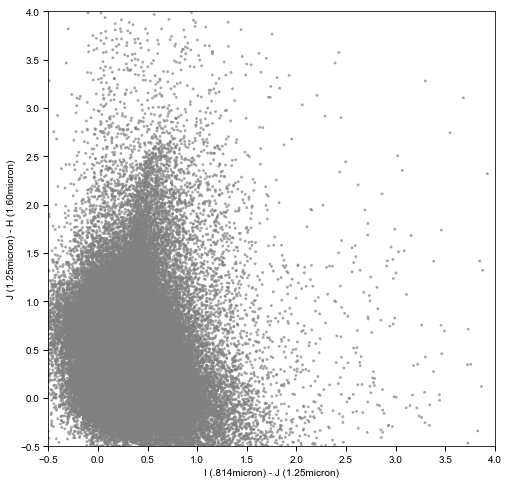

In [20]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f125_f160,f814_f125,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig('/Users/Andy/Desktop/IJH_full_all.pdf')

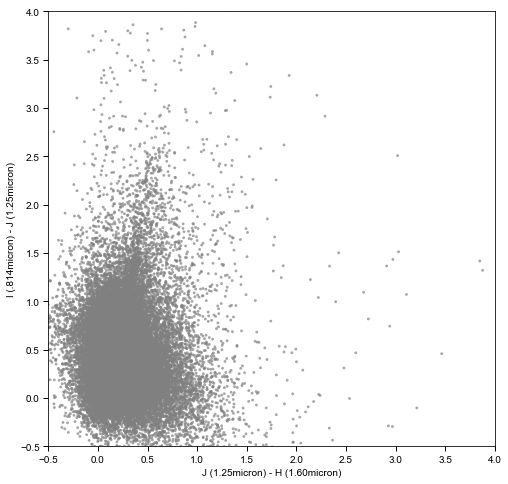

In [21]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f125_f160_gds,f814_f125_gds,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig('/Users/Andy/Desktop/IJH_full_gds.pdf')

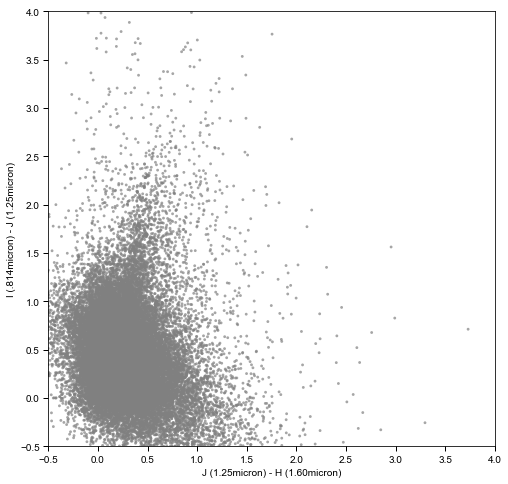

In [22]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f125_f160_egs,f814_f125_egs,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig('/Users/Andy/Desktop/IJH_full_egs.pdf')

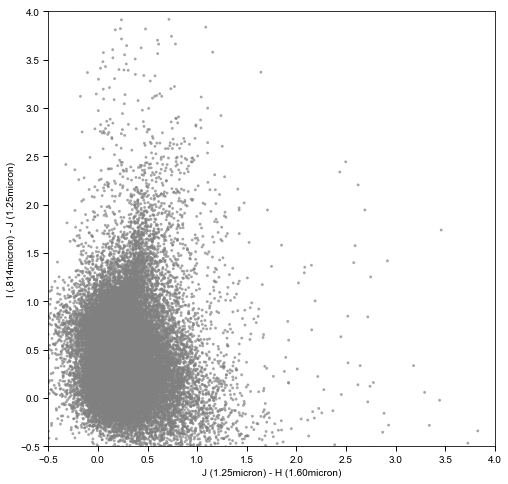

In [23]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f125_f160_gdn,f814_f125_gdn,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig('/Users/Andy/Desktop/IJH_full_gdn.pdf')

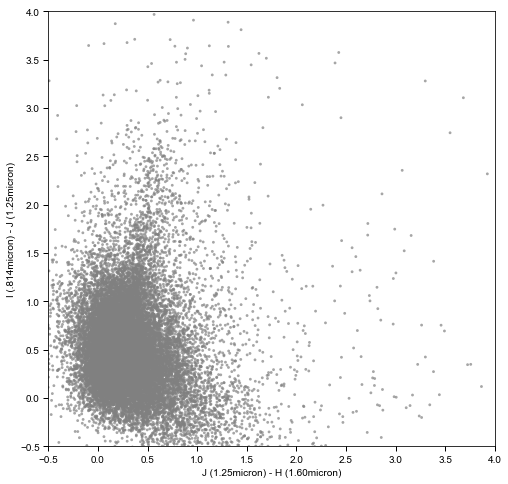

In [24]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f125_f160_cos,f814_f125_cos,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig('/Users/Andy/Desktop/IJH_full_cos.pdf')